In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline

# Problem 1

In [2]:
dataset = pd.read_csv("train.csv")
print(dataset)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

# Problem 2

<blockquote>
    The dataset is for a competition. It contains every aspect of resisdential homes in Ames, Iowa such as General shape of property, Flatness, Slope, Neighborhood, Original construction date, Heating, etc.
</blockquote>

# Problem 3

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
target = dataset["SalePrice"]
print(target)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [17]:
print(len(dataset.columns))
print(dataset[dataset.columns[1:len(dataset.columns)-1]].describe())

81
        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273 

# Problem 4

AxesSubplot(0.125,0.125;0.698618x0.755)


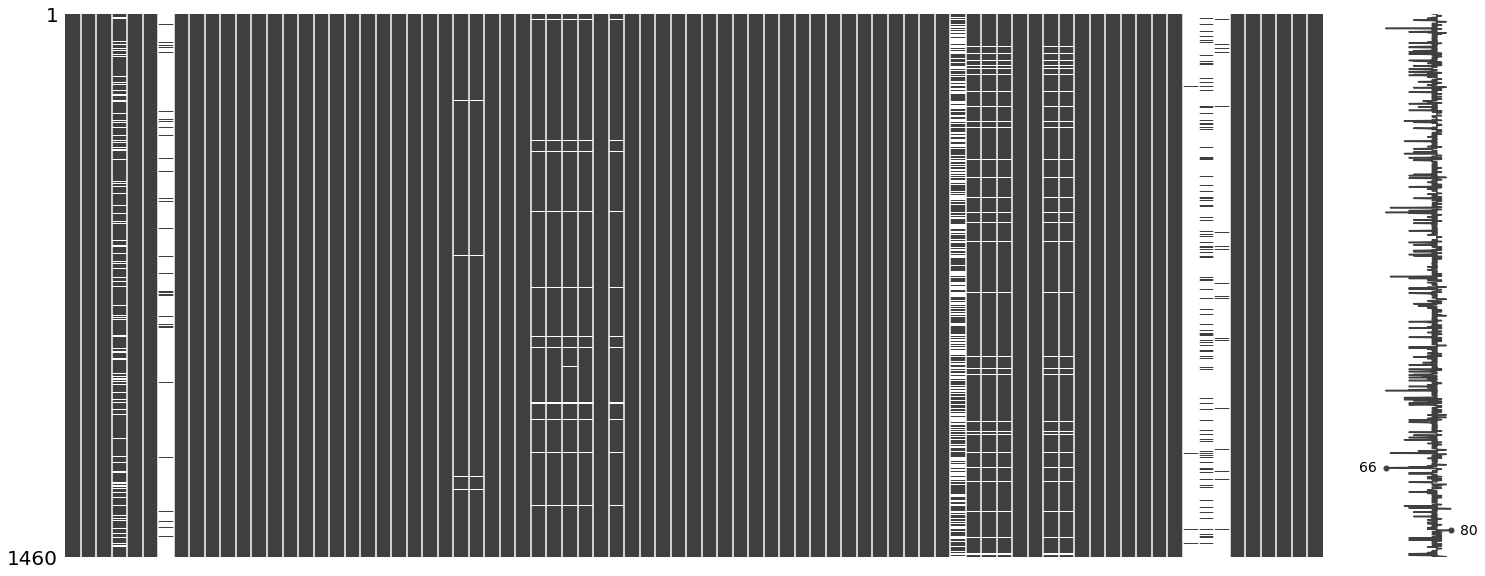

In [24]:
print(msno.matrix(dataset))

In [57]:
miss_values = dataset.isnull().mean() * 100
print("Percentage of missing values:", miss_values)

Percentage of missing values: Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


In [82]:
deleted_dataset = dataset.drop(columns = dataset.columns[dataset.isnull().sum().to_numpy() >= 5])
print(deleted_dataset)

        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0   

# Problem 5

<blockquote>
    <ul>
        <li><b>Skewness</b> is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.
        <li><b>Kurtosis</b> is a measure of the "tailedness" of the probability distribution of a real-valued random variable. Like <b>skewness</b>, kurtosis describes the shape of a probability distribution and there are different ways of quantifying it for a theoretical distribution and corresponding ways of estimating it from a sample from a population.
    </ul>
</blockquote>

# Problem 6

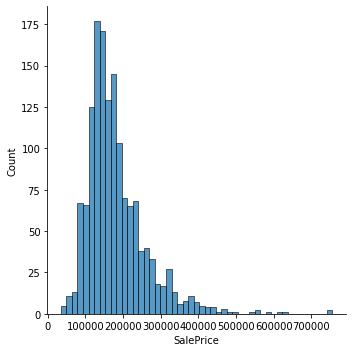

In [85]:
print(sns.displot(dataset[dataset.columns[-1]]))

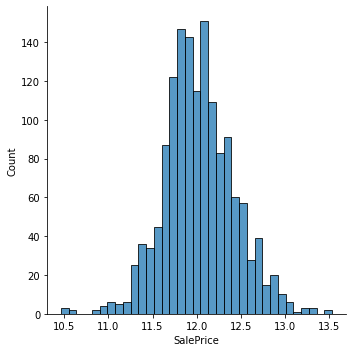

In [86]:
print(sns.displot(np.log(dataset[dataset.columns[-1]])))

In [93]:
print("Kurtosis value:", np.log(dataset[dataset.columns[-1]]).kurt())
print("Skewness value:", np.log(dataset[dataset.columns[-1]]).skew())

Kurtosis value: 0.8095319958036296
Skewness value: 0.12133506220520406


<blockquote>
    The transformation changes the data to a normal form, and reduce skewness which helps in further calculation.
</blockquote>

# Problem 7

[['Id', 'Id'], ['MSSubClass', 'MSSubClass'], ['LotFrontage', 'LotFrontage'], ['LotArea', 'LotArea'], ['OverallQual', 'OverallQual'], ['OverallQual', 'YearBuilt'], ['OverallQual', 'YearRemodAdd'], ['OverallQual', 'TotalBsmtSF'], ['OverallQual', 'GrLivArea'], ['OverallQual', 'FullBath'], ['OverallQual', 'GarageYrBlt'], ['OverallQual', 'GarageCars'], ['OverallQual', 'GarageArea'], ['OverallQual', 'SalePrice'], ['OverallCond', 'OverallCond'], ['YearBuilt', 'OverallQual'], ['YearBuilt', 'YearBuilt'], ['YearBuilt', 'YearRemodAdd'], ['YearBuilt', 'GarageYrBlt'], ['YearBuilt', 'GarageCars'], ['YearBuilt', 'SalePrice'], ['YearRemodAdd', 'OverallQual'], ['YearRemodAdd', 'YearBuilt'], ['YearRemodAdd', 'YearRemodAdd'], ['YearRemodAdd', 'GarageYrBlt'], ['YearRemodAdd', 'SalePrice'], ['MasVnrArea', 'MasVnrArea'], ['BsmtFinSF1', 'BsmtFinSF1'], ['BsmtFinSF1', 'TotalBsmtSF'], ['BsmtFinSF1', 'BsmtFullBath'], ['BsmtFinSF2', 'BsmtFinSF2'], ['BsmtUnfSF', 'BsmtUnfSF'], ['TotalBsmtSF', 'OverallQual'], ['Tota

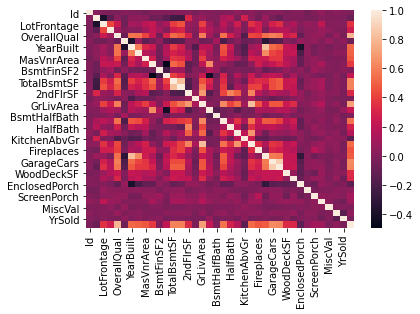

In [110]:
# Heat map of the correlation coefficient matrix and find the high correlation coefficients
corr = dataset.corr(method = 'pearson')
sns.heatmap(corr)
high_corr = []
for i in corr.columns:
    for j in corr.T.columns:
        if np.abs(corr[i][j]) > 0.5:
            high_corr.append([i, j])
print(high_corr)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']
              OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
OverallQual      1.000000   0.572323      0.550684     0.537808  0.476224   
YearBuilt        0.572323   1.000000      0.592855     0.391452  0.281986   
YearRemodAdd     0.550684   0.592855      1.000000     0.291066  0.240379   
TotalBsmtSF      0.537808   0.391452      0.291066     1.000000  0.819530   
1stFlrSF         0.476224   0.281986      0.240379     0.819530  1.000000   
GrLivArea        0.593007   0.199010      0.287389     0.454868  0.566024   
FullBath         0.550600   0.468271      0.439046     0.323722  0.380637   
TotRmsAbvGrd     0.427452   0.095589      0.191740     0.285573  0.409516   
GarageCars       0.600671   0.537850      0.420622     0.434585  0.439317   
GarageArea       0.562022   0.478954      0.371600     0.486665  0.489782   

           

<AxesSubplot:>

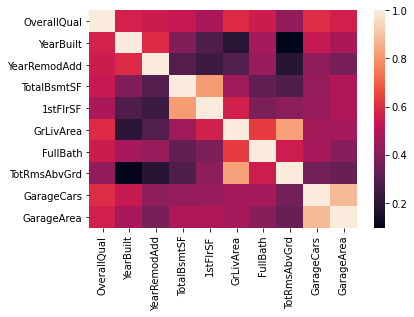

In [129]:
# Correlation heat map for 10 high correlation features with the target variable
high_corr_features = []
for i in high_corr:
    if i[0] == 'SalePrice' and i[1] != 'SalePrice':
        high_corr_features.append(i[1])
print(high_corr_features)
high_corr_features_value = dataset[high_corr_features].corr(method = 'pearson')
print(high_corr_features_value)
sns.heatmap(high_corr_features_value)

<blockquote>
    It shows that some of these features have good interactions with one another and all of them contribute largely to the target feature <b>SalePrice</b>. An example of this is <b>Total square feet of basement area</b> and <b>First floor square feet</b>.
</blockquote>

In [133]:
# Find 3 combinations of the 10 selected features that have high correlation coefficients with each other
narrowed_high_corr_features = []
for i in high_corr_features_value.columns:
    for j in high_corr_features_value.T.columns:
        if high_corr_features_value[i][j] > 0.5 and i != j:
            narrowed_high_corr_features.append([i, j])
print("3 combinations that have high correlation coefficients with each other:", narrowed_high_corr_features[:3])

3 combinations that have high correlation coefficients with each other: [['OverallQual', 'YearBuilt'], ['OverallQual', 'YearRemodAdd'], ['OverallQual', 'TotalBsmtSF']]
